<a href="https://colab.research.google.com/github/HT696/LocalSearchPicture/blob/main/AIProjectGeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imported Libraries

In [98]:
from skimage.io import imshow, imread
from skimage import img_as_bool ,img_as_uint, exposure ,img_as_ubyte
from skimage.io import imsave
import random
import copy
import numpy as np
from matplotlib import pyplot as plt

#imported images

In [2]:
P=64

In [3]:
rgb=imread("/content/drive/MyDrive/Colab Notebooks/content/rgb.jpg")
gray=imread("/content/drive/MyDrive/Colab Notebooks/content/gray.jpg")
binary=img_as_bool(imread("/content/drive/MyDrive/Colab Notebooks/content/gray.jpg"))

(64, 64, 3) [[[156 140 140]
  [157 143 143]
  [154 142 144]
  ...
  [180 180 188]
  [182 182 190]
  [185 185 193]]

 [[157 141 141]
  [159 145 145]
  [157 145 147]
  ...
  [173 173 181]
  [180 180 188]
  [186 186 196]]

 [[157 141 141]
  [161 147 147]
  [161 149 151]
  ...
  [168 168 176]
  [172 172 182]
  [177 177 187]]

 ...

 [[201 188 154]
  [185 172 138]
  [206 191 158]
  ...
  [ 29  27  38]
  [ 22  24  36]
  [ 17  21  32]]

 [[192 179 145]
  [194 181 147]
  [200 187 153]
  ...
  [ 30  28  39]
  [ 15  17  29]
  [ 19  23  34]]

 [[193 183 148]
  [205 195 160]
  [189 176 142]
  ...
  [ 34  32  43]
  [ 13  15  27]
  [ 21  25  36]]]


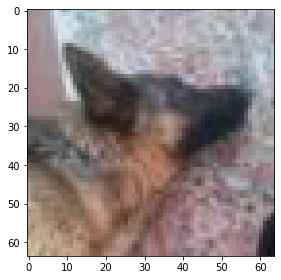

In [4]:
imshow(rgb)
print(rgb.shape,rgb)

(64, 64) [[144 145 144 ... 184 185 185]
 [144 147 147 ... 176 182 187]
 [145 150 151 ... 168 174 180]
 ...
 [186 172 193 ...  28  23  19]
 [177 180 187 ...  29  17  21]
 [180 193 177 ...  33  14  23]]


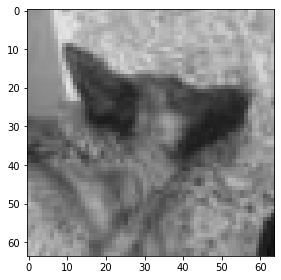

In [5]:
imshow(gray)
print(gray.shape,gray)

(64, 64) [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


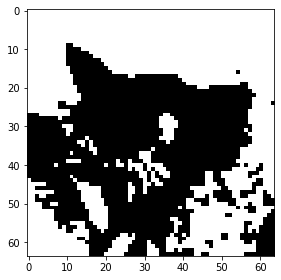

In [6]:
imshow(binary)
print(binary.shape
,binary)

#Genetic Algorithm

##Functions

In [7]:
def Breed(Breeders,Target):
  Children=[]
  temp=0
  geneSize=len(Target)
  while temp<len(Breeders):
    Point=random.choice(range(geneSize))#Point of heritage , Cutting genes
    #print("Point :",Point)
    cGenes=Breeders[temp].genes[0:Point]+Breeders[temp+1].genes[Point:]#Child 1 Genes
    #print("G1 :",cGenes)
    Children.append(chromosome(cGenes,fitnessFunc(Target,cGenes))) 
    cGenes=Breeders[temp+1].genes[0:Point]+Breeders[temp].genes[Point:]#Child 2 Genes
    #print("G1 :",cGenes)
    Children.append(chromosome(cGenes,fitnessFunc(Target,cGenes)))
    temp+=2

  return Children

In [8]:
def mutate(Mutants,GeneSet,Target):
    for i in Mutants :
      i.genes[random.choice(range(len(i.genes)))]=random.choice(GeneSet)
      i.fitness=fitnessFunc(Target,i.genes)
    return Mutants


In [9]:
def Eugenics(Population,Weights,popSize):
  while len(Population)>popSize :
    Worst =getWorst(Weights)
    del Population[Worst],Weights[Worst]
  Weights=getWeights(Population)
  return Weights

In [10]:
def InitPop(Size,length, geneSet,Target) :
  Pop=[]
  for i in range(0,Size):
    Pop.append(generate_individual(length, geneSet,Target))
  return Pop

In [11]:
def getWeights(Population):
  Weights=[]
  Sum=0
  L=len(Population)
  for i in range(0,L):
    Fit = Population[i].fitness
    Weights.append(Fit)
    Sum+=Fit
  return np.divide(Weights,Sum).tolist()


In [12]:
#Returns Index of the Best 
def getBest(Weights):
  temp=np.array(Weights)
  return (np.where(temp==max(temp))[0][0])

In [13]:
#Returns Index of the Worst 
def getWorst(Weights):
  temp=np.array(Weights)
  return (np.where(temp==min(temp))[0][0])

In [14]:
def generate_individual(length, geneSet,Target):
    genes = []
    while len(genes) < length:
        sampleSize = min(length - len(genes), len(geneSet))
        genes.extend(random.sample(geneSet, sampleSize))
    fitness = fitnessFunc(genes,Target)
    return chromosome(genes, fitness)

In [15]:
#chromosome = individual
class chromosome:
    def __init__(self, genes, fitness):
        self.genes = genes
        self.fitness = fitness

In [16]:
def Plot(genPlot,genFit,popSize):
  plt.plot(genPlot,genFit,label='Population : '+str(popSize))

  plt.xlabel('Generations')
  plt.ylabel('Fitness(Pixels)')
  plt.title('Efficancy')
  plt.legend()
  plt.show()

##Binary

###Functions

In [ ]:
def MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target) :
  gen=0
  genFit=[] # the Fittest in the generation
  MatingNum=int(MatingNum)*2 # Number of Breeders
  Breeders=[]
  Mutants=[]
  GeneSet=[0,1]
  
  genPlot=[] # Plotting Generations


  Population=InitPop(popSize,Target.size,geneSet,Target)
  Weights=getWeights(Population)


  while gen < maxGen :
  
    Breeders=copy.copy(np.random.choice(Population, MatingNum,
                           p=Weights))
    Children=Breed(Breeders,Target)
    #print()
    for c in Children :
      Mutants=np.random.choice([c]+[False],1,p=[mutation_rate,0.95])
      if Mutants.any():
        mutate(Mutants,GeneSet,Target)
    Population=Population+Children
    Weights=getWeights(Population)
    Weights=Eugenics(Population,Weights,popSize)
    if gen%10==0:
      Best=Population[getBest(Weights)]
    
      genPlot.append(gen)
      genFit.append(Best.fitness)
    if gen%100==0 :
      print(gen)
  #  if gen%2000==0 and gen != 0:
  #    ShowImg(Best.genes)
    gen+=1
  Plot(genPlot,genFit,popSize)
  print("\n final Output :",Best.fitness,"Ratio :",Best.fitness/len(Target))
  ShowImg(Best.genes)  

In [ ]:
def fitnessFunc (Target,individual):
  if len(Target)!=len(individual):
    print("Error Genes not Eq")
  return np.sum(Target==individual)

In [ ]:
def ShowImg(IMG):
  IMG=[True if i==1 else False for i in IMG]
  image=np.reshape(IMG,(P,P)).copy()
  print(image.shape)
  imshow(image)

###Hyper-Parameters 

In [ ]:
geneSet=[0,1]
popSize=10
maxGen=1000
mutation_rate=0.05
MatingNum=popSize/4 # Number of Mating Pairs

Declarations

In [ ]:
gen=0
genFit=[] # the Fittest in the generation
MatingNum=int(MatingNum)*2 # Number of Breeders , Make Sure Its an Even Number 
Breeders=[]
Mutants=[]
GeneSet=[0,1]
Target=np.reshape(binary,P*P)
genPlot=[] # Plotting Generations

###CODE:

(64, 64)


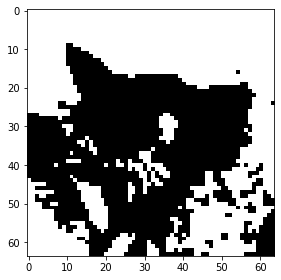

In [ ]:
ShowImg(Target)

####Population : 10

low Population , low Generation , Medium Replacement Speed : 51.8

0
100
200
300
400
500
600
700
800
900


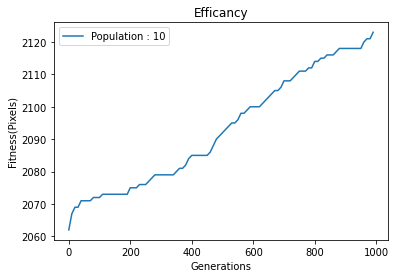


 final Output : 2123 Ratio : 0.518310546875
(64, 64)


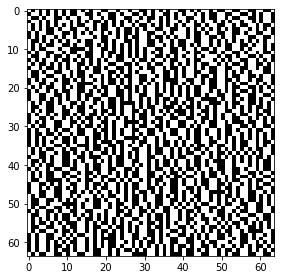

In [ ]:
popSize=10
maxGen=1000
MatingNum=popSize/4 # REPLACE Half of the Population 
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

53.7

0
100
200
300
400
500
600
700
800
900


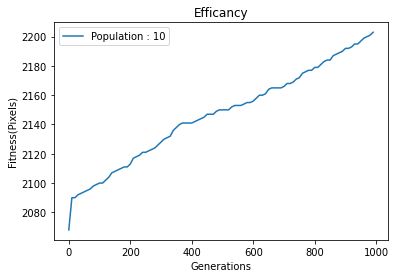


 final Output : 2203 Ratio : 0.537841796875
(64, 64)


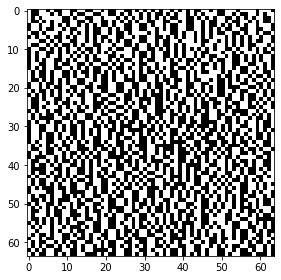

In [ ]:
popSize=10
maxGen=1000
MatingNum=popSize/2 # REPLACE ALL of the Population 
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

HIGHer Replacement : 55.3

0
100
200
300
400
500
600
700
800
900


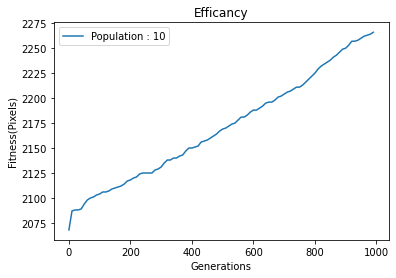


 final Output : 2266 Ratio : 0.55322265625
(64, 64)


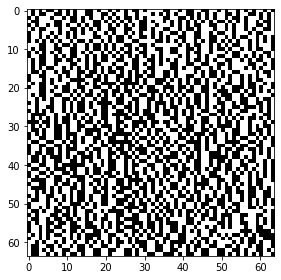

In [ ]:
popSize=10
maxGen=1000
MatingNum=popSize # REPLACE ALL of the Population 
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

 61.0

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


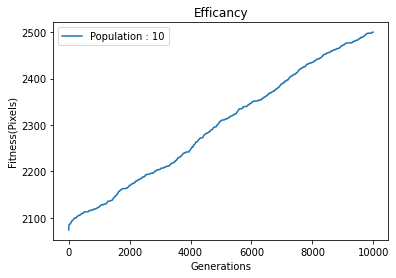


 final Output : 2500 Ratio : 0.6103515625
(64, 64)


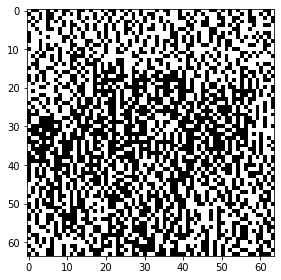

In [ ]:
popSize=10
maxGen= 10000
MatingNum=popSize/4
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

71.2

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


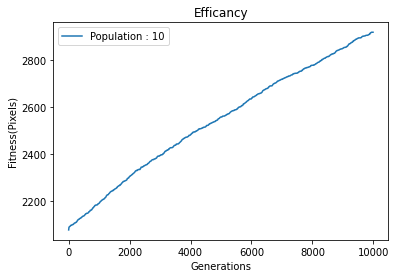


 final Output : 2920 Ratio : 0.712890625
(64, 64)


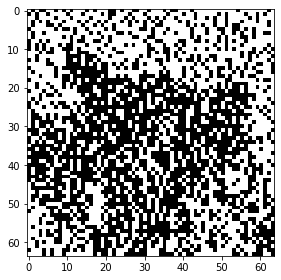

In [ ]:
popSize=10
maxGen= 10000
MatingNum=popSize/2
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

#### Population : 50 

#####Generations : 1000

55.8

0
100
200
300
400
500
600
700
800
900


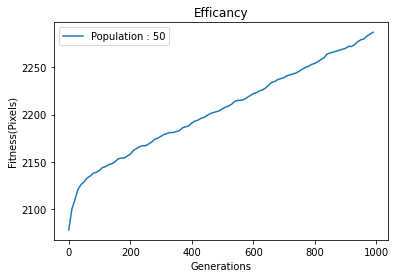


 final Output : 2287 Ratio : 0.558349609375
(64, 64)


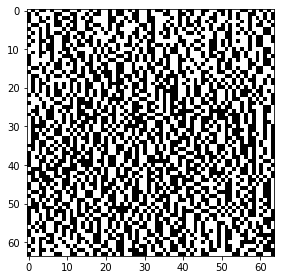

In [ ]:
popSize=50
maxGen=1000
MatingNum=popSize/2 *(1/2) #Replace Half of the Pop
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

58.4

0
100
200
300
400
500
600
700
800
900


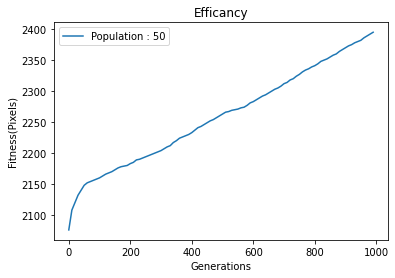


 final Output : 2395 Ratio : 0.584716796875
(64, 64)


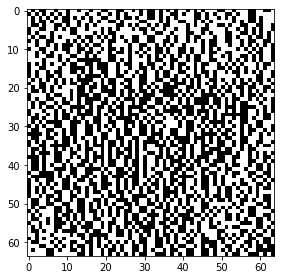

In [ ]:
popSize=50
maxGen=1000
MatingNum=popSize/2* (0.8) # Replace 80 percent of Population
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

60.2

0
100
200
300
400
500
600
700
800
900


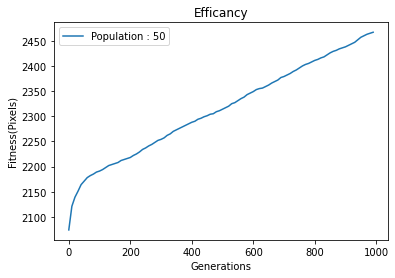


 final Output : 2467 Ratio : 0.602294921875
(64, 64)


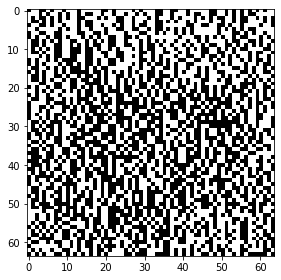

In [ ]:
popSize=50
maxGen=1000
MatingNum=popSize/2
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

#####Generations : 10000

###### Replacement Rate : 50 %

82.7

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


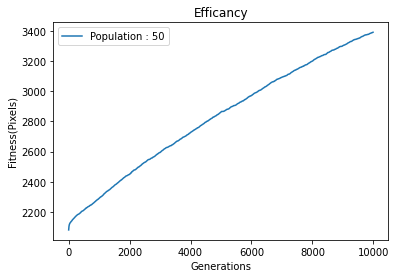


 final Output : 3391 Ratio : 0.827880859375
(64, 64)


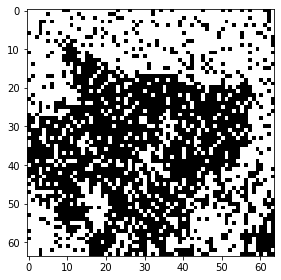

In [ ]:
popSize=50
maxGen=10000
MatingNum=popSize/2 *(1/2) #Replace Half of the Pop
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

###### Replacement Rate : 80%

92.4

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


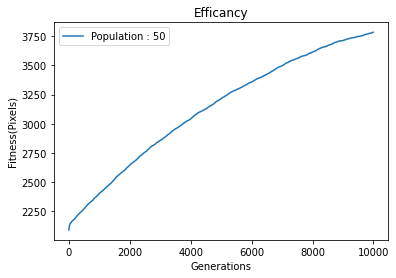


 final Output : 3785 Ratio : 0.924072265625
(64, 64)


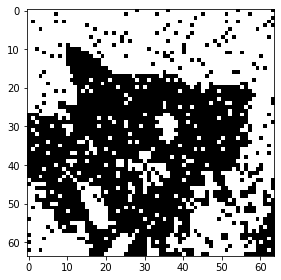

In [ ]:
popSize=50
maxGen=10000
MatingNum=popSize/2 *(0.8) #Replace 80% of the Pop
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

###### Replacement Rate : 100 %

95.4

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


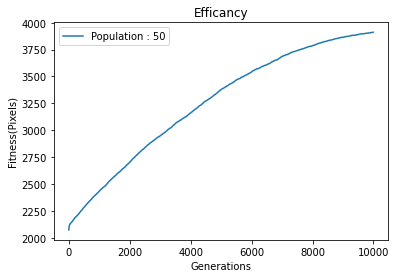


 final Output : 3911 Ratio : 0.954833984375
(64, 64)


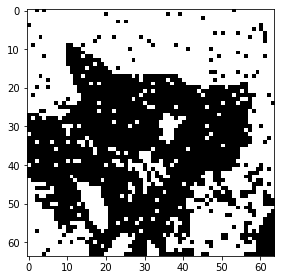

In [ ]:
popSize=50
maxGen=10000
MatingNum=popSize/2 #Replace Half of the Pop
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

####Population 100

##### Generation : 1000

###### Replacement Rate : 50%

51.4

0
100
200
300
400
500
600
700
800
900


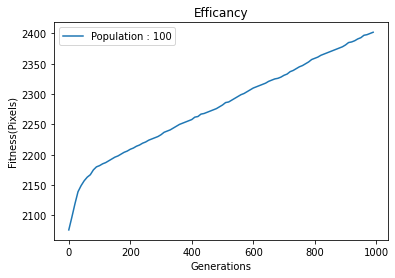


 final Output : 2402 Ratio : 0.58642578125
(64, 64)


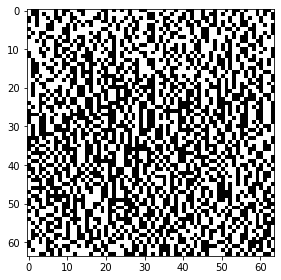

In [ ]:
popSize=100
maxGen=1000
MatingNum=popSize/4
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

######Replacement Rate : 100 %

62.8

0
100
200
300
400
500
600
700
800
900


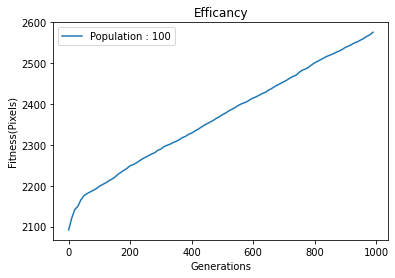


 final Output : 2576 Ratio : 0.62890625
(64, 64)


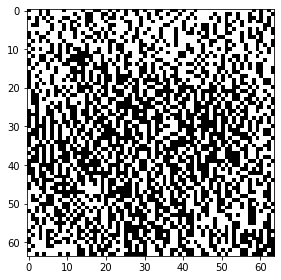

In [ ]:
popSize=100
maxGen=1000
MatingNum=popSize/2
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

##### Generation 10000

###### Replacement Rate : 50%

92.8

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


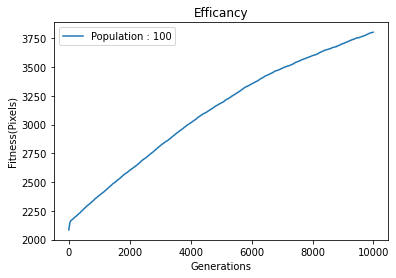


 final Output : 3804 Ratio : 0.9287109375
(64, 64)


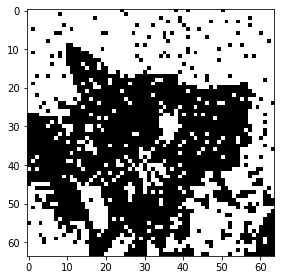

In [ ]:
popSize=100
maxGen= 10000
MatingNum=popSize/4
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

###### Repalcement Rate ; 80 %

98.5

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


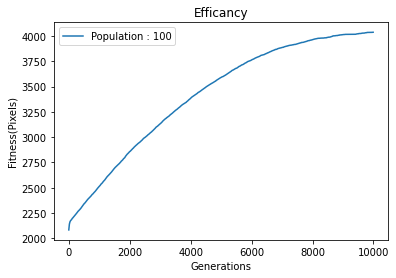


 final Output : 4036 Ratio : 0.9853515625
(64, 64)


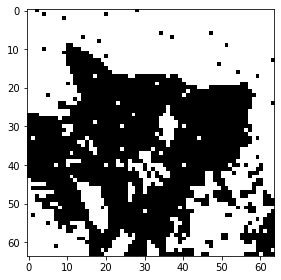

In [ ]:
popSize=100
maxGen= 10000
MatingNum=(popSize/2)*(0.8)
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

######Replacement Rate : 100 %

99.6

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


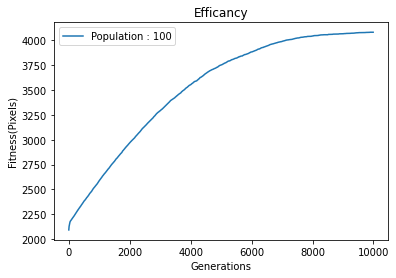


 final Output : 4082 Ratio : 0.99658203125
(64, 64)


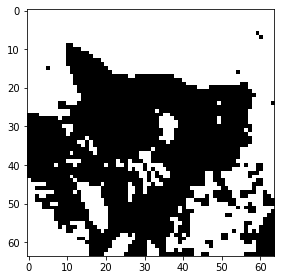

In [ ]:
popSize=100
maxGen= 10000
MatingNum=popSize/2 
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

##GrayScale

###Functions

In [17]:
def MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target) :
  gen=0
  genFit=[] # the Fittest in the generation
  MatingNum=int(MatingNum)*2 # Number of Breeders
  Breeders=[]
  Mutants=[]
  GeneSet=geneSet
  
  genPlot=[] # Plotting Generations


  Population=InitPop(popSize,Target.size,geneSet,Target)
  Weights=getWeights(Population)


  while gen < maxGen :
  
    Breeders=copy.copy(np.random.choice(Population, MatingNum,
                           p=Weights))
    Children=Breed(Breeders,Target)
    #print()
    for c in Children :
      Mutants=np.random.choice([c]+[False],1,p=[mutation_rate,0.95])
      if Mutants.any():
        mutate(Mutants,GeneSet,Target)
    Population=Population+Children
    Weights=getWeights(Population)
    Weights=Eugenics(Population,Weights,popSize)
    if gen%10==0:
      Best=Population[getBest(Weights)]
    
      genPlot.append(gen)
      genFit.append(Best.fitness)
    if gen%100==0 :
      print(gen)
  #  if gen%2000==0 and gen != 0:
  #    ShowImg(Best.genes)
    gen+=1
  Plot(genPlot,genFit,popSize)
  print("\n final Output :",Best.fitness,"Ratio :",Best.fitness/len(Target))
  ShowImg(Best.genes)  
  return Best

In [18]:
def fitnessFunc (Target,individual):
  if len(Target)!=len(individual):
    print("Error Genes not Eq")
  return np.sum(Target==individual)

In [58]:
def ShowImg(IMG):
  image=np.array(IMG)
  
  image = exposure.rescale_intensity(image, in_range='uint8')
  image=img_as_uint(image)
  image=np.reshape(image,(P,P)).copy()
  
  print(image.shape)
  imshow(image)

####Hyper-Parameters

In [20]:
geneSet=range(0,256)
popSize=10
maxGen=1000
mutation_rate=0.05
MatingNum=popSize/4 # Number of Mating Pairs

####Declarations

In [60]:
gen=0
genFit=[] # the Fittest in the generation
MatingNum=int(MatingNum)*2 # Number of Breeders , Make Sure Its an Even Number 
Breeders=[]
Mutants=[]
Target=np.reshape(gray,P*P)
genPlot=[] # Plotting Generations

###Code

(64, 64)


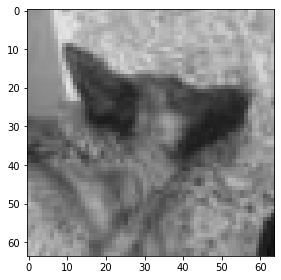

In [61]:
ShowImg(Target)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


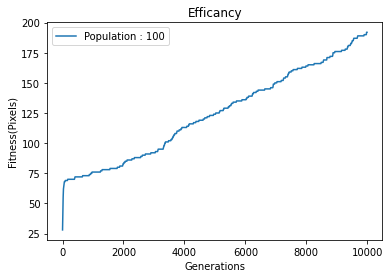


 final Output : 192 Ratio : 0.046875
(64, 64)


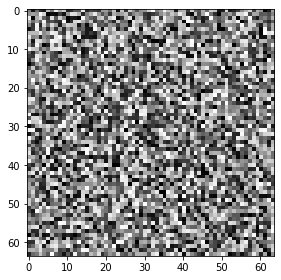

In [24]:
popSize=100
maxGen=10000
MatingNum=popSize/2*(0.8)  # REPLACE 80% of the Population 
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

**Previous Fitness Function Doesnt Work as well because now we have (64 \* 64)\*256 genes which requires much more resources and time for the same performance but on the other hand we doesnt care as much about pixels being exactly equal**

###Alternarive Functions

In [25]:
def fitnessFunc (Target,individual):
  if len(Target)!=len(individual):
    print("Error Genes not Eq")
  return np.array(Target).sum()-np.absolute(np.subtract(Target,individual)).sum()

In [26]:
def MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target) :
  gen=0
  genFit=[] # the Fittest in the generation
  MatingNum=int(MatingNum)*2 # Number of Breeders
  Breeders=[]
  Mutants=[]
  GeneSet=geneSet
  
  genPlot=[] # Plotting Generations


  Population=InitPop(popSize,Target.size,geneSet,Target)
  Weights=getWeights(Population)


  while gen < maxGen :
  
    Breeders=copy.copy(np.random.choice(Population, MatingNum,
                           p=Weights))
    Children=Breed(Breeders,Target)
    #print()
    for c in Children :
      Mutants=np.random.choice([c]+[False],1,p=[mutation_rate,0.95])
      if Mutants.any():
        mutate(Mutants,GeneSet,Target)
    Population=Population+Children
    Weights=getWeights(Population)
    Weights=Eugenics(Population,Weights,popSize)
    if gen%10==0:
      Best=Population[getBest(Weights)]
    
      genPlot.append(gen)
      genFit.append(Best.fitness)
    if gen%100==0 :
      print(gen)
  #  if gen%2000==0 and gen != 0:
  #    ShowImg(Best.genes)
    gen+=1
  Plot(genPlot,genFit,popSize)
  print("\n final Output :",Best.fitness,"Ratio :",Best.fitness/np.array(Target).sum())
  ShowImg(Best.genes)  
  return Best

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


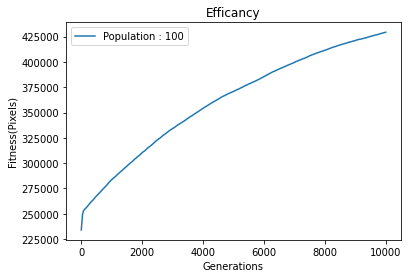


 final Output : 429342.0 Ratio : 0.8248597990789679
(64, 64)


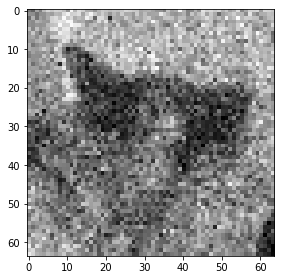

In [27]:
popSize=100
maxGen=10000
MatingNum=(popSize/2)*(0.8) # REPLACE 80% of the Population 
MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

##RGB

###Functions

In [62]:
def fitnessFunc (Target,individual):
  if len(Target)!=len(individual):
    print("Error Genes not Eq")
  return np.array(Target).sum()-np.absolute(np.subtract(Target,individual)).sum()

In [63]:
def MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target) :
  gen=0
  genFit=[] # the Fittest in the generation
  MatingNum=int(MatingNum)*2 # Number of Breeders
  Breeders=[]
  Mutants=[]
  GeneSet=geneSet
  
  genPlot=[] # Plotting Generations


  Population=InitPop(popSize,Target.size,geneSet,Target)
  Weights=getWeights(Population)


  while gen < maxGen :
  
    Breeders=copy.copy(np.random.choice(Population, MatingNum,
                           p=Weights))
    Children=Breed(Breeders,Target)
    #print()
    for c in Children :
      Mutants=np.random.choice([c]+[False],1,p=[mutation_rate,0.95])
      if Mutants.any():
        mutate(Mutants,GeneSet,Target)
    Population=Population+Children
    Weights=getWeights(Population)
    Weights=Eugenics(Population,Weights,popSize)
    if gen%10==0:
      Best=Population[getBest(Weights)]
    
      genPlot.append(gen)
      genFit.append(Best.fitness)
    if gen%100==0 :
      print(gen)
  #  if gen%2000==0 and gen != 0:
  #    ShowImg(Best.genes)
    gen+=1
  Plot(genPlot,genFit,popSize)
  print("\n final Output :",Best.fitness,"Ratio :",Best.fitness/np.array(Target).sum())
  ShowImg(Best.genes)  
  return Best

In [102]:
def ShowImg(IMG):
  image=np.array(IMG)
  image=np.reshape(image,(P,P,3)).copy()
  image = exposure.rescale_intensity(image, in_range='uint8')
  image=img_as_ubyte(image)
  
  
  print(image.shape)
  imshow(image)

####Declarations

In [73]:
gen=0
genFit=[] # the Fittest in the generation
MatingNum=int(MatingNum)*2 # Number of Breeders , Make Sure Its an Even Number 
Breeders=[]
Mutants=[]
Target=np.reshape(rgb,P*P*3)
genPlot=[] # Plotting Generations

###Code

In [116]:
#%%timeit
Target

array([156, 140, 140, ...,  21,  25,  36], dtype=uint8)

(64, 64, 3)


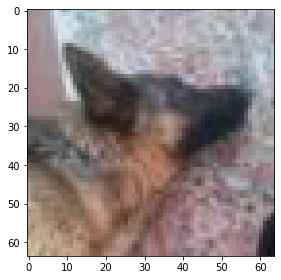

In [103]:
ShowImg(Target)

######Population : 100

13:11 , 64%

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


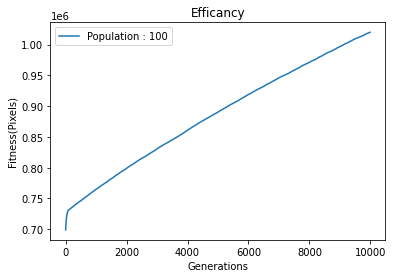


 final Output : 1020175.0 Ratio : 0.6467266032898791
(64, 64, 3)


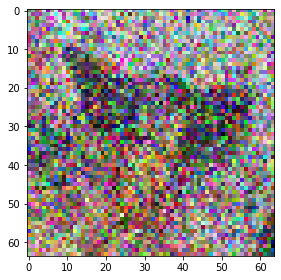

In [107]:
popSize=100
maxGen=10000
MatingNum=(popSize/2)*(0.8) # REPLACE 80% of the Population 
temp=MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

40:14 , 82.3



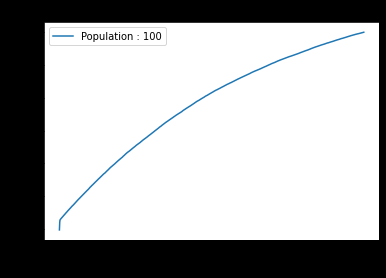












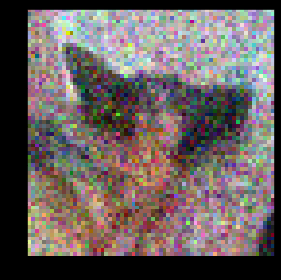

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

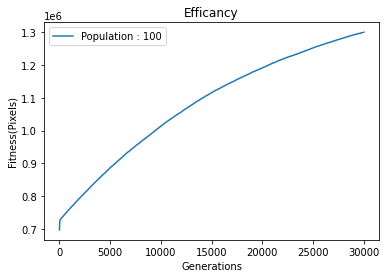


 final Output : 1299313.0 Ratio : 0.8236824888870857
(64, 64, 3)


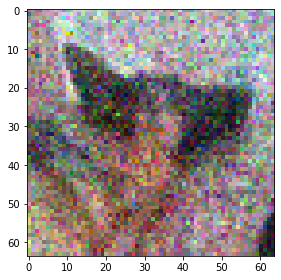

In [114]:
popSize=100
maxGen=30000
MatingNum=(popSize/2)*(0.8) # REPLACE 80% of the Population 
temp=MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

##### Population : 50

6:43 , 59.4

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


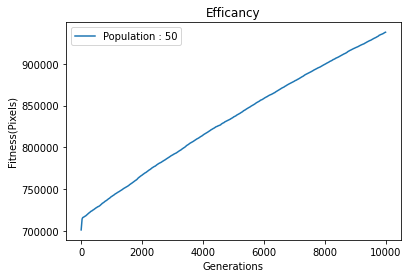


 final Output : 937700.0 Ratio : 0.5944426553335649
(64, 64, 3)


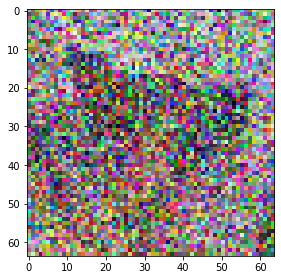

In [112]:
popSize=50
maxGen=10000
MatingNum=(popSize/2)*(0.8) # REPLACE 80% of the Population 
temp=MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

12:5 , 68.8

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

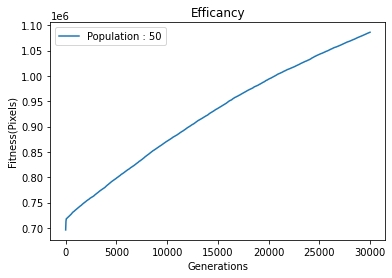


 final Output : 1086232.0 Ratio : 0.6886025747982178
(64, 64, 3)


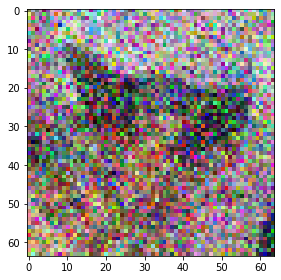

In [113]:
popSize=50
maxGen=30000
MatingNum=(popSize/2)*(0.5) # REPLACE 80% of the Population 
temp=MODEL(geneSet,popSize,maxGen,mutation_rate,MatingNum,Target)

###Alternative Approach